In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [3]:
# Create synthetic dataset with normal and anomalous points
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_anomaly = rng.uniform(low=-4, high=4, size=(10, 2))
X = np.vstack([X_normal, X_anomaly])


In [4]:
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred = iso_forest.predict(X)


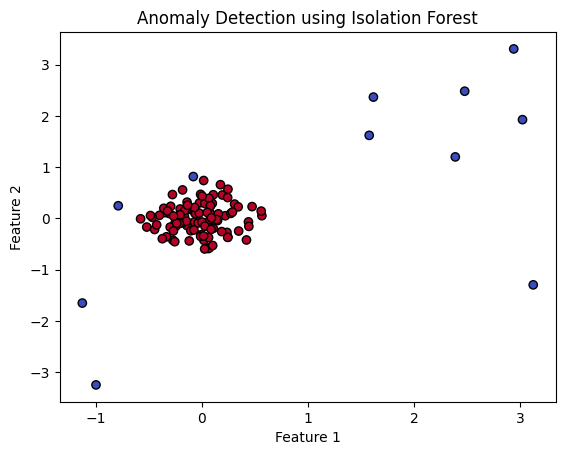

In [5]:
# Plot normal and anomaly points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


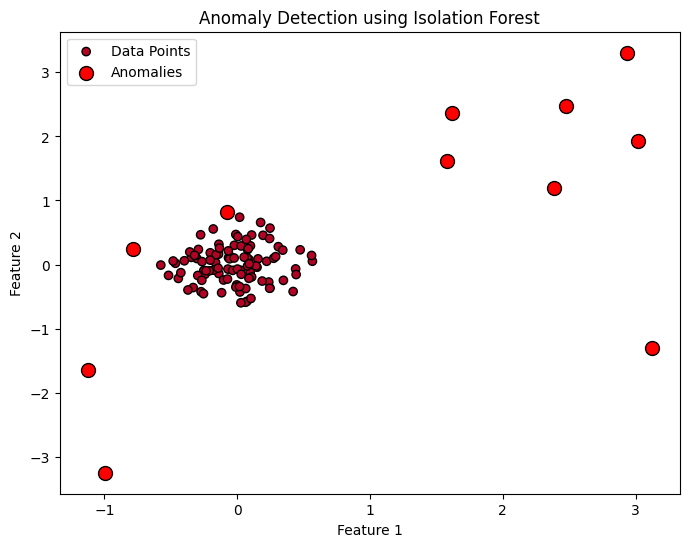

Anomalous Data Points:
[[-0.78592353  0.24657075]
 [-0.07939705  0.81605075]
 [ 3.01898458  1.92614894]
 [ 1.57612593  1.61987267]
 [-1.12407079 -1.65126525]
 [ 2.47488924  2.48090716]
 [ 2.93657855  3.30592442]
 [ 2.38636143  1.19971145]
 [ 1.61573502  2.36634136]
 [ 3.12004273 -1.29603875]
 [-0.99533638 -3.24814448]]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Set random seed for reproducibility
np.random.seed(42)

# Generate normal data points (clustered around 0)
X_normal = 0.3 * np.random.randn(100, 2)

# Generate anomalous data points (scattered far from the center)
X_anomaly = np.random.uniform(low=-4, high=4, size=(10, 2))

# Combine normal and anomalous data
X = np.vstack([X_normal, X_anomaly])

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred = iso_forest.predict(X)

# Convert predictions to boolean for easier visualization
anomalies = (y_pred == -1)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', label="Data Points")
plt.scatter(X[anomalies, 0], X[anomalies, 1], color='red', edgecolors='k', label="Anomalies", s=100)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Print anomaly points
print("Anomalous Data Points:")
print(X[anomalies])


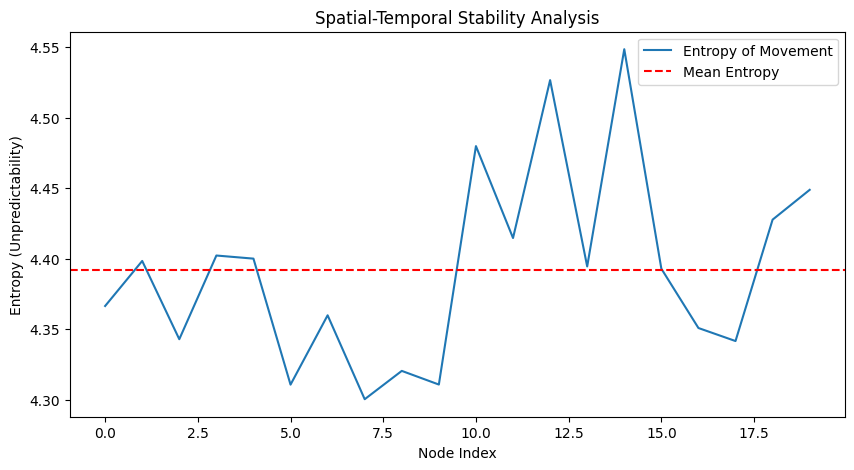

Detected Unstable Nodes: [12 15 17 19]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import entropy

# Generate synthetic spatial-temporal data (simulating FANET mobility)
np.random.seed(42)
time_steps = 100
nodes = 10

# Simulate stable movements (low variance) vs. unstable (high variance)
stable_data = np.cumsum(np.random.randn(time_steps, nodes) * 0.2, axis=0)
unstable_data = np.cumsum(np.random.randn(time_steps, nodes) * 1.5, axis=0)

# Combine and create labels
X = np.hstack([stable_data, unstable_data])
labels = np.array([0] * nodes + [1] * nodes)  # 0=Stable, 1=Unstable

# Train Isolation Forest to detect unstable movements
iso_forest = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
iso_forest.fit(X.T)
y_pred = iso_forest.predict(X.T)  # -1 = anomaly, 1 = normal

# Calculate entropy for stability measurement
entropy_values = [entropy(abs(X[:, i])) for i in range(X.shape[1])]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(entropy_values, label="Entropy of Movement")
plt.axhline(y=np.mean(entropy_values), color='r', linestyle='--', label="Mean Entropy")
plt.xlabel("Node Index")
plt.ylabel("Entropy (Unpredictability)")
plt.legend()
plt.title("Spatial-Temporal Stability Analysis")
plt.show()

# Print detected unstable nodes
unstable_nodes = np.where(y_pred == -1)[0]
print("Detected Unstable Nodes:", unstable_nodes)
